## Epsilon vs IsoScore

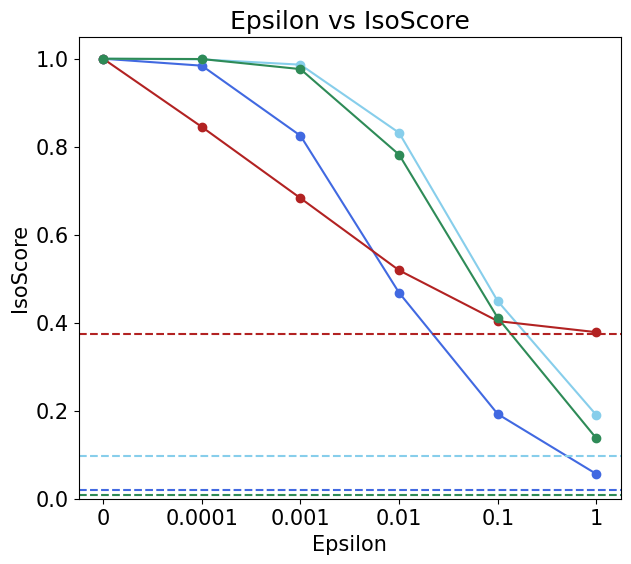

In [148]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x-axis values
epsilon_values = [0, 0.0001, 0.001, 0.01, 0.1, 1]

# Define the y-axis values (IsoScore)
codebert_isoscore_values = []
codebert_ft_isoscore_values = []
codet5p_isoscore_values = []
codellama_isoscore_values = []
# Create the line plot
plt.figure(figsize=(7, 6))
plt.plot(range(len(epsilon_values)), codebert_isoscore_values, marker='o', color='royalblue', label='CodeBERT')
plt.plot(range(len(epsilon_values)), codebert_ft_isoscore_values, marker='o', color='skyblue', label='CodeBERT Fine-tuned')
plt.plot(range(len(epsilon_values)), codet5p_isoscore_values, marker='o', color='firebrick', label='CodeT5+')
plt.plot(range(len(epsilon_values)), codellama_isoscore_values, marker='o', color='seagreen', label='CodeLlama')

# Set the x-axis label and ticks
plt.xlabel('Epsilon')
plt.xticks(range(len(epsilon_values)), epsilon_values)

# Set the y-axis label
plt.ylabel('IsoScore')
plt.ylim(0, 1.05)

# Add a title
plt.title('Epsilon vs IsoScore')
# Add a dotted line at x=0.066
plt.axhline(y=, color='royalblue', linestyle='--', label = "Baseline \nCodeBERT ")
plt.axhline(y=, color='skyblue', linestyle='--', label = "Baseline CodeBERT Fine-tuned")
plt.axhline(y=, color='firebrick', linestyle='--', label = "Baseline CodeT5+")
plt.axhline(y=, color='seagreen', linestyle='--', label = "Baseline CodeLlama")

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the figure size to make room for the legend
#plt.subplots_adjust(right=0.8)
plt.rcParams.update({'font.size': 15})
# Display the plot
plt.savefig("epsilon_isotropy.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Epsilon vs MRR

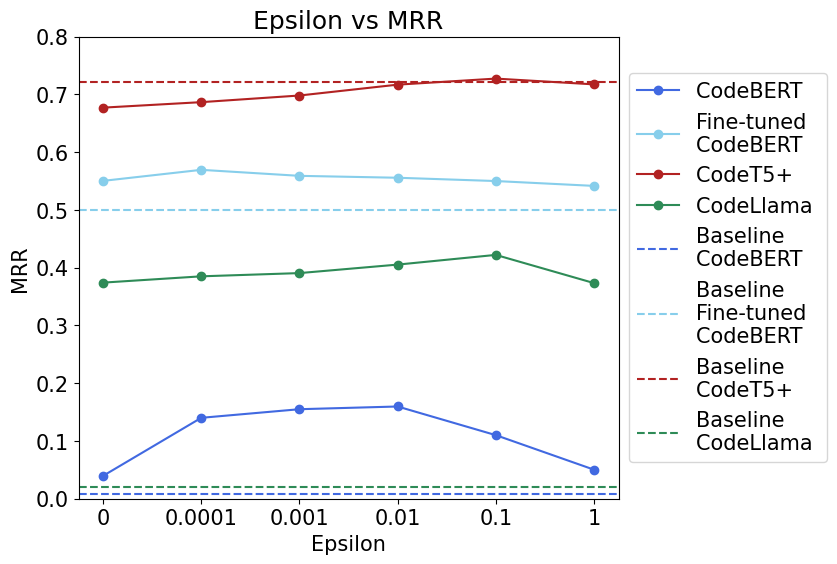

In [147]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x-axis values
epsilon_values = [0, 0.0001, 0.001, 0.01, 0.1, 1]

# Define the y-axis values (IsoScore)
codebert_mrr = []
codebert_ft_mrr = []
codet5p_mrr = []
codellama_mrr = []


# Create the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(len(epsilon_values)), codebert_mrr, marker='o', color='royalblue', label='CodeBERT ')
plt.plot(range(len(epsilon_values)), codebert_ft_mrr, marker='o', color='skyblue', label='Fine-tuned\nCodeBERT ')
plt.plot(range(len(epsilon_values)), codet5p_mrr, marker='o', color='firebrick', label='CodeT5+ ')
plt.plot(range(len(epsilon_values)), codellama_mrr, marker='o', color='seagreen', label='CodeLlama ')

# Set the x-axis label and ticks
plt.xlabel('Epsilon')
plt.xticks(range(len(epsilon_values)), epsilon_values)

# Set the y-axis label
plt.ylabel('MRR')
plt.ylim(0, 0.8)

# Add a title
plt.title('Epsilon vs MRR')
# Add a dotted line at x=0.066
plt.axhline(y=, color='royalblue', linestyle='--', label = "Baseline \nCodeBERT ")
plt.axhline(y=, color='skyblue', linestyle='--', label = "Baseline \nFine-tuned \nCodeBERT ")
plt.axhline(y=, color='firebrick', linestyle='--', label = "Baseline\nCodeT5+ ")
plt.axhline(y=, color='seagreen', linestyle='--', label = "Baseline\nCodeLlama ")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust the figure size to make room for the legend
plt.subplots_adjust(right=0.8)
# Display the plot
plt.rcParams.update({'font.size': 15})
plt.savefig("epsilon_mrr.pdf", format="pdf",bbox_inches="tight")
plt.show()

## Embedding visualizations

In [31]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.decomposition import PCA

def visualize_pca(embeddings_doc,embeddings_code, dimensions=2):
    # Perform PCA
    pca = PCA(n_components=dimensions)
    print("pca begin")
    embeddings_pca_doc = pca.fit_transform(embeddings_doc)
    del embeddings_doc
    embeddings_pca_code = pca.fit_transform(embeddings_code)
    del embeddings_code
    
    plt.figure(figsize=(5, 5))

    # Plot the embeddings
    plt.scatter(embeddings_pca_doc[:, 0], embeddings_pca_doc[:, 1], label="DOC")
    plt.scatter(embeddings_pca_code[:, 0], embeddings_pca_code[:, 1], label="CODE")
    plt.title('PCA of Embeddings')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    #plt.aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

def visualize_tsne(embeddings_doc, embeddings_code):
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d_code = tsne.fit_transform(embeddings_code)
    embeddings_2d_doc = tsne.fit_transform(embeddings_doc)

    plt.figure(figsize=(5, 5))
    plt.scatter(embeddings_2d_doc[:, 0], embeddings_2d_doc[:, 1], s=10, label="DOC")
    plt.scatter(embeddings_2d_code[:, 0], embeddings_2d_code[:, 1], s=10, label="CODE")
    plt.title('t-SNE Visualization of Embeddings')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.legend()
    plt.show()

def visualize_pca_tsne(embeddings_doc, embeddings_code):
    pca = PCA(n_components=50)
    embeddings_pca_doc = pca.fit_transform(embeddings_doc)
    del embeddings_doc
    embeddings_pca_code = pca.fit_transform(embeddings_code)
    del embeddings_code
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d_doc = tsne.fit_transform(embeddings_pca_doc)
    del embeddings_pca_doc
    embeddings_2d_code = tsne.fit_transform(embeddings_pca_code)
    del embeddings_pca_code

    plt.figure(figsize=(5, 5))
    plt.scatter(embeddings_2d_doc[:, 0], embeddings_2d_doc[:, 1], s=10, label="DOC")
    plt.scatter(embeddings_2d_code[:, 0], embeddings_2d_code[:, 1], s=10, label="CODE")
    plt.title('t-SNE Visualization of Embeddings')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.legend()
    plt.show()

def visualize_emb_vals(representations, hidden_dim, y_lim):
    plt.rcParams["figure.figsize"] = (30,3)
    x = np.arange(hidden_dim)
    
    st = np.std(representations)*2
    m = np.mean(representations)
    x = np.arange(hidden_dim)
    
    figure(figsize=(23, 3), dpi=80)
    fig= plt.bar(x,np.mean(representations, axis = 0), color='#073b4c',width=2)
    plt.xlim([0, hidden_dim])
    plt.ylim([-1*y_lim, y_lim])
    plt.xticks(fontsize=30 )
    clrs = sns.color_palette("pastel", 8)
    plt.yticks(fontsize=30 )
    plt.yticks(np.arange(-1*y_lim, y_lim+0.1, y_lim))
    plt.fill_between(x, m-st, m+st ,alpha=0.5, facecolor=clrs[7])
    
    plt.show()

# Embedding visualizaton for CodeBERT
def create_emb_visual(input_file, type, n_hid, plot_lims):
    if type =="doc":
        inputs = input_file['func_documentation_string'][:1000]
    elif type =="code":
        inputs = input_file['func_code_string'][:1000]
    encoded_input = tokenizer(inputs, padding=True, truncation=True, max_length=256, return_tensors="pt")
    encoded_input = {k: v for k, v in encoded_input.items()}
    output = model(**encoded_input)[1]
    representations = []
    for i in range(output.shape[0]):
            representations.append(output[i].detach().numpy())    
    visualize_emb_vals(representations, n_hid, plot_lims)

def whitening_features(X, method='zca'):
    """
    Whitens the input matrix X using specified whitening method.
    Inputs:
        X:      Input data matrix with data examples along the first dimension [M x N ]
        method: Whitening method. Must be one of 'zca', 'zca_cor', 'pca',
                'pca_cor', or 'cholesky'.
    """
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean
    print(X_centered.shape)
    Sigma = np.cov(X_centered, rowvar=False) # cov matrix
    P = np.corrcoef(X_centered, rowvar=False) # corr matrix
    #print("sigma shape", Sigma.shape)
    #print("corrcoef shape", P.shape)
    W = None
    
    if method in ['zca', 'pca', 'cholesky']:
        U, Lambda, _ = np.linalg.svd(Sigma) # U = eigenvectors [M x M] Lambda = eigenvalues [M x 1]
        if method == 'zca':
            W = np.dot(U, np.dot(np.diag(1.0 / np.sqrt(Lambda + 1e-5)), U.T))
        elif method =='pca':
            W = np.dot(np.diag(1.0 / np.sqrt(Lambda + 1e-5)), U.T)
        elif method == 'cholesky':
            W = np.linalg.cholesky(np.dot(U, np.dot(np.diag(1.0 / (Lambda + 1e-5)), U.T))).T
    elif method in ['zca_cor', 'pca_cor']:
        V_sqrt = np.diag(np.std(X, axis=0))
        #P = np.dot(np.dot(np.linalg.inv(V_sqrt), Sigma), np.linalg.inv(V_sqrt))
        G, Theta, _ = np.linalg.svd(P)
        if method == 'zca_cor':
            W = np.dot(np.dot(G, np.dot(np.diag(1.0 / np.sqrt(Theta + 1e-5)), G.T)), np.linalg.inv(V_sqrt))
        elif method == 'pca_cor':
            W = np.dot(np.dot(np.diag(1.0/np.sqrt(Theta + 1e-5)), G.T), np.linalg.inv(V_sqrt))
    else:
        raise Exception('Whitening method not found.')
    print("wshape ",W.shape)
    return W, np.dot(X_centered, W.T), method

def create_embs(input_file, model, type):
    if type =="doc":
        inputs = []
        for i in input_file['func_documentation_tokens']:
            inputs.append(' '.join(i).strip())
    elif type =="code":
        inputs = []
        for i in input_file['func_code_tokens']:
            inputs.append(' '.join(i).strip())
    encoded_input = tokenizer(inputs, padding=True, truncation=True, max_length=256, return_tensors="pt")
    encoded_input = {k: v for k, v in encoded_input.items()}
    output = model(**encoded_input)[1]
    representations = []
    for i in range(output.shape[0]):
            representations.append(output[i].detach().numpy())    
    return np.array(representations) #visualize_emb_vals(representations, n_hid, plot_lims)

In [1]:
from transformers import AutoTokenizer, AutoModel

model_ckpt = "microsoft/codebert-base"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt, trust_remote_code=True)
model = AutoModel.from_pretrained(model_ckpt, trust_remote_code=True)

In [29]:
from datasets import load_dataset

input_file = load_dataset("code_search_net", "ruby")["test"]

/media/data2/adiera/code_emb/venv/lib/python3.10/site-packages/datasets/load.py:1454: FutureWarning: The repository for code_search_net contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/code_search_net
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


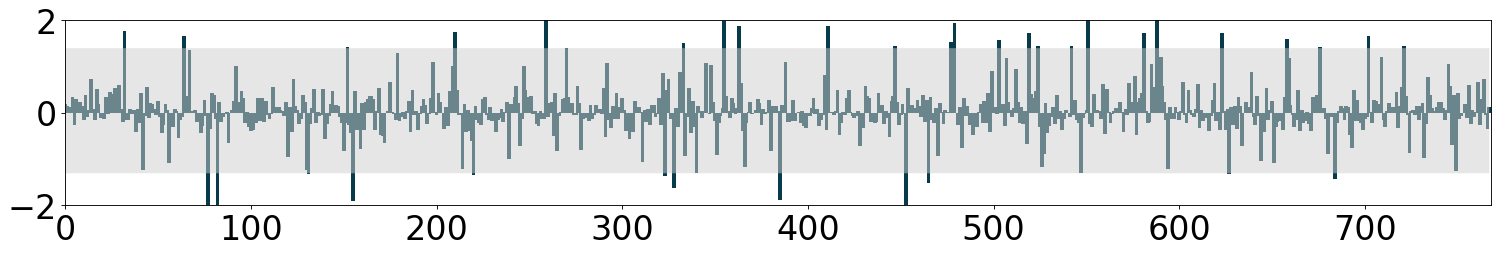

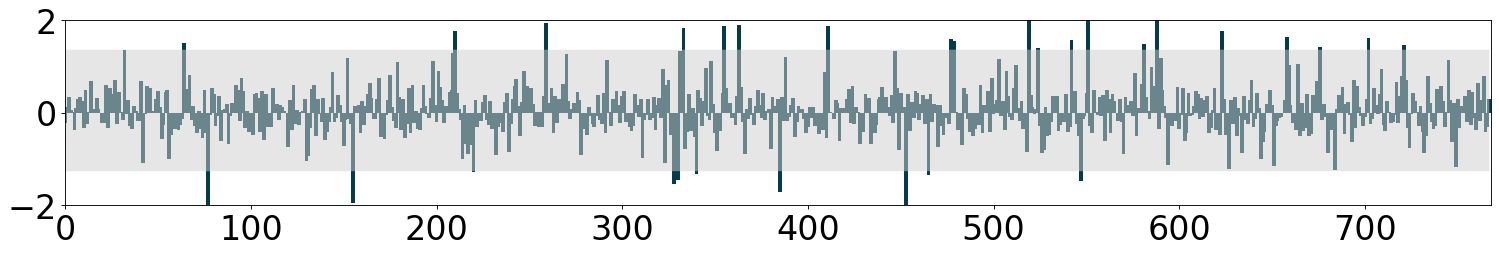

In [13]:
create_emb_visual(input_file,"doc", 768, 2)
create_emb_visual(input_file,"code", 768, 2)

pca begin


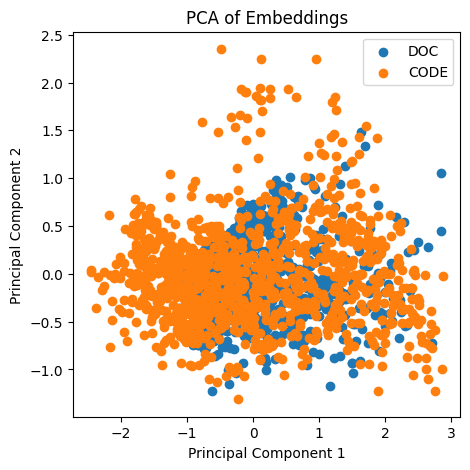

In [32]:
code_embs = create_embs(input_file[:1000], model, 'code')
doc_embs = create_embs(input_file[:1000], model, 'doc')
visualize_pca(doc_embs, code_embs)

(1000, 768)
wshape  (768, 768)
(1000, 768)
wshape  (768, 768)
pca begin


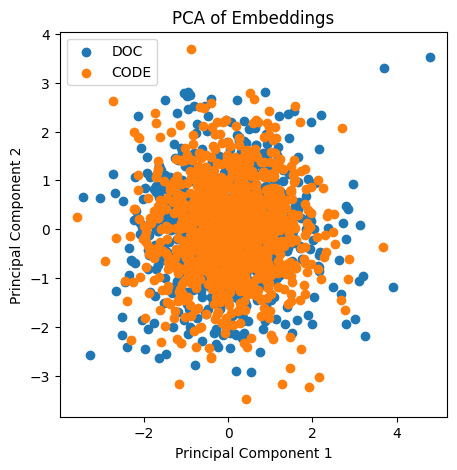

In [34]:
_, whitened_code_embs, _ = whitening_features(code_embs)
_, whitened_doc_embs, _ = whitening_features(doc_embs)
visualize_pca(whitened_doc_embs, whitened_code_embs)